In [1]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\david\AppData\R

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Analizando texto

In [2]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [3]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [4]:
print(len(text1))

260819


In [5]:
vocabulario = sorted(set(text1))
print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [6]:
rl = len(vocabulario) / len(text1)
print(f"Riqueza Léxica: {rl}")

Riqueza Léxica: 0.07406285585022564


In [7]:
def riqueza_lexica(texto):
    vocabulario = sorted(set(texto))
    return len(vocabulario) / len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [8]:
def porcentaje_palabra(palabra, texto):
    return texto.count(palabra) / len(texto) * 100

In [9]:
porcentaje_palabra('monster', text1)

0.018786974875296663

# Estadistica del lenguaje

In [10]:
fdist = FreqDist(text1)

In [11]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

<Axes: xlabel='Samples', ylabel='Counts'>

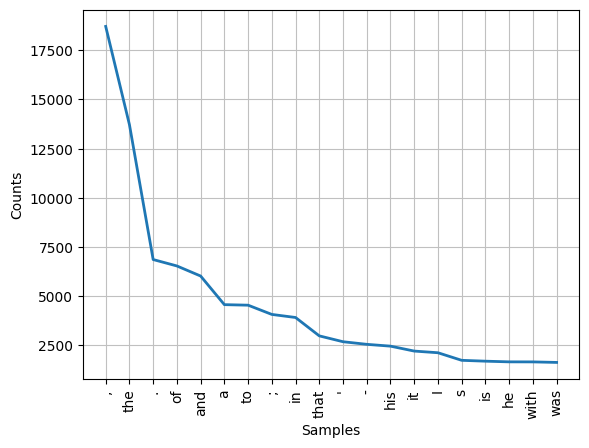

In [12]:
fdist.plot(20,)

In [13]:
fdist['monster']

49